In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Dataset-DS/police.csv")
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [ ]:
df.shape 

(91741, 15)

In [75]:
df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

country_name column has no value present hence we drop the column

In [76]:
df = df.drop(['county_name'], axis=1)

In [77]:
df.duplicated().sum()

479

In [78]:
df.dtypes

stop_date              object
stop_time              object
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [79]:
df = df.fillna(df.mean(numeric_only=True))

In [80]:
df = df.dropna()

In [81]:
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [ ]:
df['driver_age'] = 2025 - df['driver_age_raw'] 

In [84]:
df['stop_date'] = pd.to_datetime(df['stop_date'])

In [98]:
def eventTime(time):
    time = time.split(":")[0]
    if time < "12":
        return "Morning"
    elif time > "12" and time < "3":
        return "Afternoon"
    elif time > "3" and time < "6":
        return "Evening"
    else:
        return "Night"

df['stop_at'] = df['stop_time'].apply(eventTime)

C:\Users\91755\AppData\Local\Temp\ipykernel_5664\1714436803.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = cnt.index, y= cnt.values, palette='rainbow')


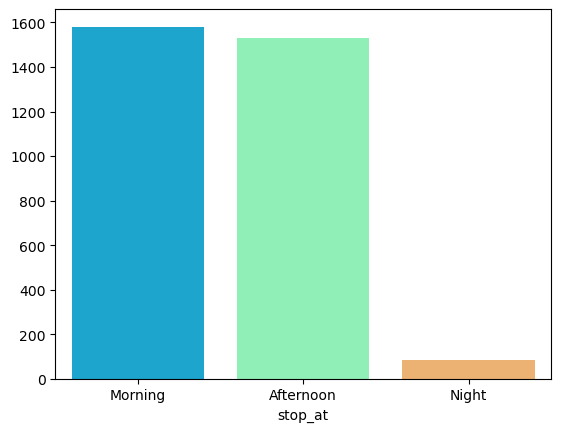

In [118]:
cnt = df['stop_at'].value_counts()
ax = sns.barplot(x = cnt.index, y= cnt.values, palette='rainbow')


``` Conclusion : Most people are stopped by police at Morning time ```

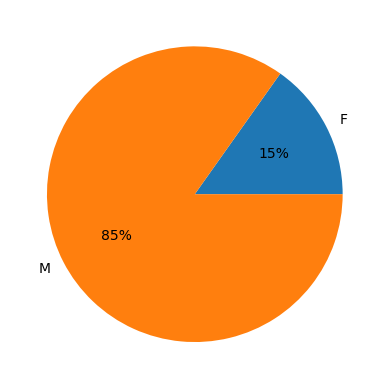

In [142]:
genderWiseArrest = df.groupby('driver_gender')['is_arrested'].sum()
plt.pie(df.groupby('driver_gender')['is_arrested'].sum(), labels=genderWiseArrest.index, autopct='%1.0f%%')

plt.show()

<Axes: xlabel='count', ylabel='violation'>

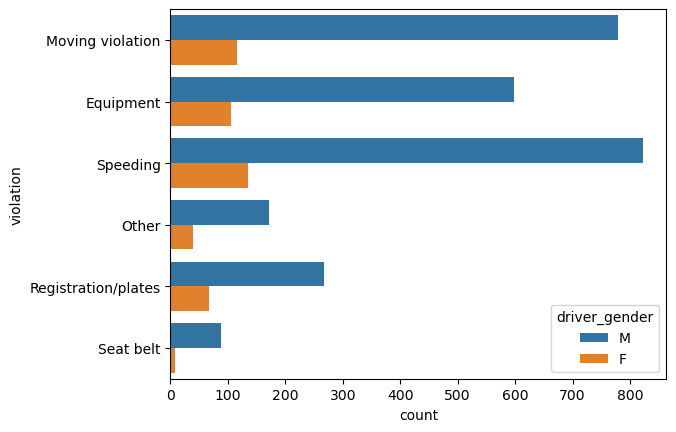

In [155]:
sns.countplot(y = df['violation'],hue='driver_gender', data=df)


<Axes: xlabel='drugs_related_stop', ylabel='Count'>

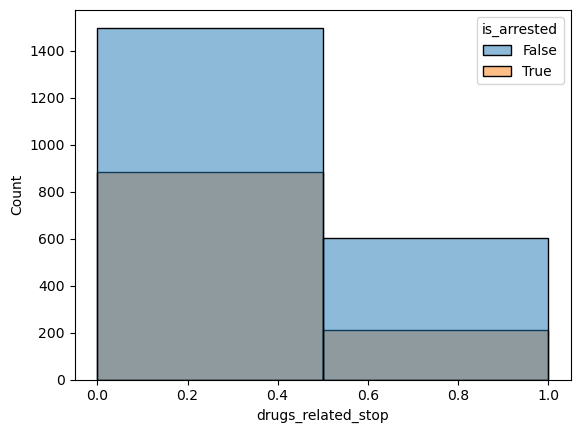

In [164]:
sns.histplot(x = df['drugs_related_stop'], hue=df['is_arrested'], bins=2)

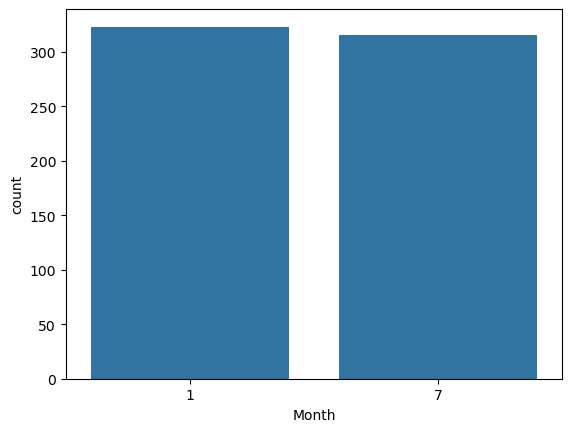

In [176]:
ax = sns.barplot(df['stop_date'].dt.month.value_counts().head(2))
ax.set_xlabel("Month")
plt.show()

In [196]:
df['driver_age'] = df['driver_age'].replace(2025, df['driver_age'].mean())

In [197]:
df['driver_age'].unique()

array([46.        , 37.        , 50.        , 47.        , 69.        ,
       45.        , 78.        , 44.        , 38.        , 39.        ,
       70.        , 61.        , 62.        , 72.        , 48.        ,
       49.        , 64.        , 42.        , 58.        , 67.        ,
       68.        , 40.        , 43.        , 52.        , 60.        ,
       57.        , 63.        , 83.        , 66.        , 54.        ,
       41.        , 81.        , 51.        , 55.        , 59.        ,
       53.        , 74.        , 71.        , 76.        , 36.        ,
       77.        , 56.        , 65.        , 46.42021277, 86.        ,
       24.        , 34.        , 80.        , 87.        , 75.        ,
       32.        , 73.        , 33.        , 35.        , 79.        ,
       93.        , 95.        , 85.        , 82.        , 31.        ,
       12.        , 29.        , 30.        , 28.        ])

<Axes: xlabel='driver_age', ylabel='Count'>

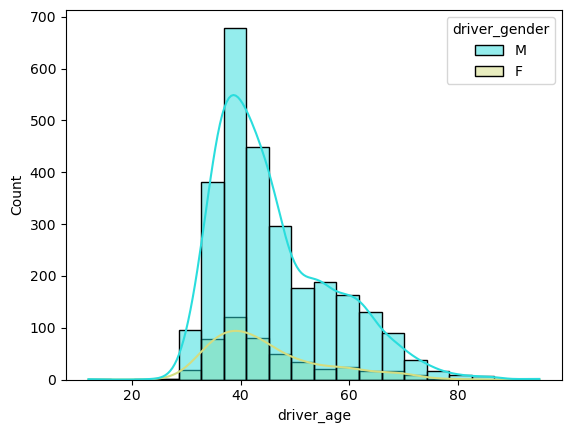

In [207]:
sns.histplot(x = df['driver_age'], kde=True, hue='driver_gender',data=df, palette='rainbow',bins=20)

In [211]:
df['is_arrested'] = df['is_arrested'].replace({True: 1, False:0})

In [ ]:
df['driver_age']=df['driver_age'].astype('int')

<Axes: >

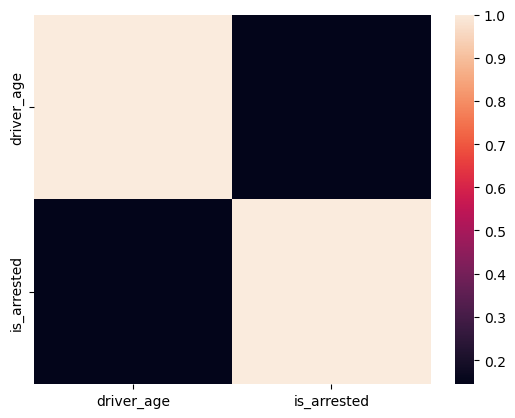

In [224]:
sns.heatmap(df[['driver_age','is_arrested']].corr())